In [89]:
# Importo librerías

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
import scipy.stats as stats
from scipy.stats import shapiro

# Configuración ara poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

In [90]:
def dataframe_exploration(df,df_name):

    print("*" * 50,"\n")
    print(f"--- DATAFRAME EXPLORATION: {df_name} ---\n")
    print("*" * 50,"\n")
    
    # Estructura del dataframe y tipos de datos
    print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
    
    print(f"Muestra de filas aleatorias:")
    display(df.sample(5))
    
    print(f"\nTipos de datos por columna:")
    display(pd.DataFrame(df.dtypes, columns = ["tipo_dato"]))
    
    print(f"\nInformacion del DataFrame:")
    display(df.info())
    print("_" * 50,"\n")

    # Valores duplicados
    duplicated_values = df.duplicated().sum()
    duplicated_percentage = round(duplicated_values / df.shape[0] * 100, 2)
    print(f"Numero de duplicados en el conjunto de datos son: {duplicated_values}, un {duplicated_percentage}%.\n")
    print("_" * 50,"\n")

    # Valores nulos
    print("Valores nulos por columna:")
    null_values = df.isnull().sum()
    null_percentage = null_values / df.shape[0] * 100
    df_nulos = pd.DataFrame(null_percentage, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("_" * 50,"\n")
    
    # Estadisticas basicas para columnas numericas
    col_num = df.select_dtypes(include=["number"])
    if not col_num.empty:
        print("Estadisticas basicas de columnas numericas:")
        df_num_est = pd.DataFrame(col_num.describe().T)
        display(df_num_est)
        
        # Visualizacion de valores atipicos
        print("\nEstadisticas basicas de columnas numericas:")   
        fig, axes = plt.subplots(nrows=1, ncols=len(col_num.columns), figsize=(16, 5))
        for ax, col in zip(axes.flat, col_num.columns):
            sns.boxplot(x=col, data=df, ax=ax)
        plt.tight_layout()
        plt.show()
            
    else:
        print("\nNo hay columnas numericas en el DataFrame.")

    # Mostrar estadisticas basicas para columnas categoricas
    col_cat = df.select_dtypes(include=["object", "category"])
    if not col_cat.empty:
        print("\nEstadisticas basicas de columnas categoricas:")
        df_cat_est = pd.DataFrame(col_cat.describe().T)
        display(df_cat_est)
    else:
        print("\nNo hay columnas categoricas en el DataFrame.\n")
        
    print("\n\n")

************************************************** 

--- DATAFRAME EXPLORATION: Finanzas Hotel Bookings ---

************************************************** 

El DataFrame tiene 182877 filas y 32 columnas.

Muestra de filas aleatorias:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,0
121312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
141302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transient
68206,City Hotel,True,164.0,2017.0,May,20.0,15.0,1.0,2.0,1.0,0.0,0.0,BB,PRT,Groups,TA/TO,0.0,0.0,0.0,A,A,0.0,NaN,NaN,0.0,Transient,160.0,0.0,0.0,Canceled,2017-01-31 00:00:00,NaN
128565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
52792,City Hotel,True,69.0,NaN,June,25.0,12.0,2.0,4.0,1.0,0.0,0.0,BB,PRT,Offline TA/TO,TA/TO,0.0,0.0,0.0,NaN,A,0.0,236.0,NaN,0.0,Transient,120.0,0.0,0.0,Canceled,2016-04-27 00:00:00,NaN



Tipos de datos por columna:


,tipo_dato
hotel,object
is_canceled,object
lead_time,float64
arrival_date_year,float64
arrival_date_month,object
arrival_date_week_number,float64
arrival_date_day_of_month,float64
stays_in_weekend_nights,float64
stays_in_week_nights,float64
adults,float64



Informacion del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 182877 entries, 0 to 182876
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  object 
 2   lead_time                       119490 non-null  float64
 3   arrival_date_year               64829 non-null   float64
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        101004 non-null  float64
 6   arrival_date_day_of_month       119271 non-null  float64
 7   stays_in_weekend_nights         119490 non-null  float64
 8   stays_in_week_nights            119490 non-null  float64
 9   adults                          119428 non-null  float64
 10  children                        69302 non-null   float64
 11  babies                          119431 non-null  float6

None

__________________________________________________ 

Numero de duplicados en el conjunto de datos son: 63040, un 34.47%.

__________________________________________________ 

Valores nulos por columna:


,%_nulos
hotel,34.715683
is_canceled,34.715683
lead_time,34.661002
arrival_date_year,64.550490
arrival_date_month,34.715683
arrival_date_week_number,44.769435
arrival_date_day_of_month,34.780754
stays_in_weekend_nights,34.661002
stays_in_week_nights,34.661002
adults,34.694904


__________________________________________________ 

Estadisticas basicas de columnas numericas:


,count,mean,std,min,25%,50%,75%,max
lead_time,119490.0,104.172628,106.975949,0.00,18.00,69.000,161.0,737.000000
arrival_date_year,64829.0,2016.156196,0.706674,2015.00,2016.00,2016.000,2017.0,2017.000000
arrival_date_week_number,101004.0,27.175785,13.613871,1.00,16.00,28.000,38.0,53.000000
arrival_date_day_of_month,119271.0,15.795977,8.780503,1.00,8.00,16.000,23.0,31.000000
stays_in_weekend_nights,119490.0,0.939461,1.082472,0.00,0.00,1.000,2.0,19.914715
stays_in_week_nights,119490.0,2.515068,1.976511,0.00,1.00,2.000,3.0,50.000000
adults,119428.0,6.244423,14.574814,0.00,2.00,2.000,2.0,59.000000
children,69302.0,0.125162,0.688305,0.00,0.00,0.000,0.0,19.000000
babies,119431.0,0.019903,0.433366,0.00,0.00,0.000,0.0,19.000000
is_repeated_guest,114376.0,0.031877,0.175674,0.00,0.00,0.000,0.0,1.000000



Estadisticas basicas de columnas numericas:


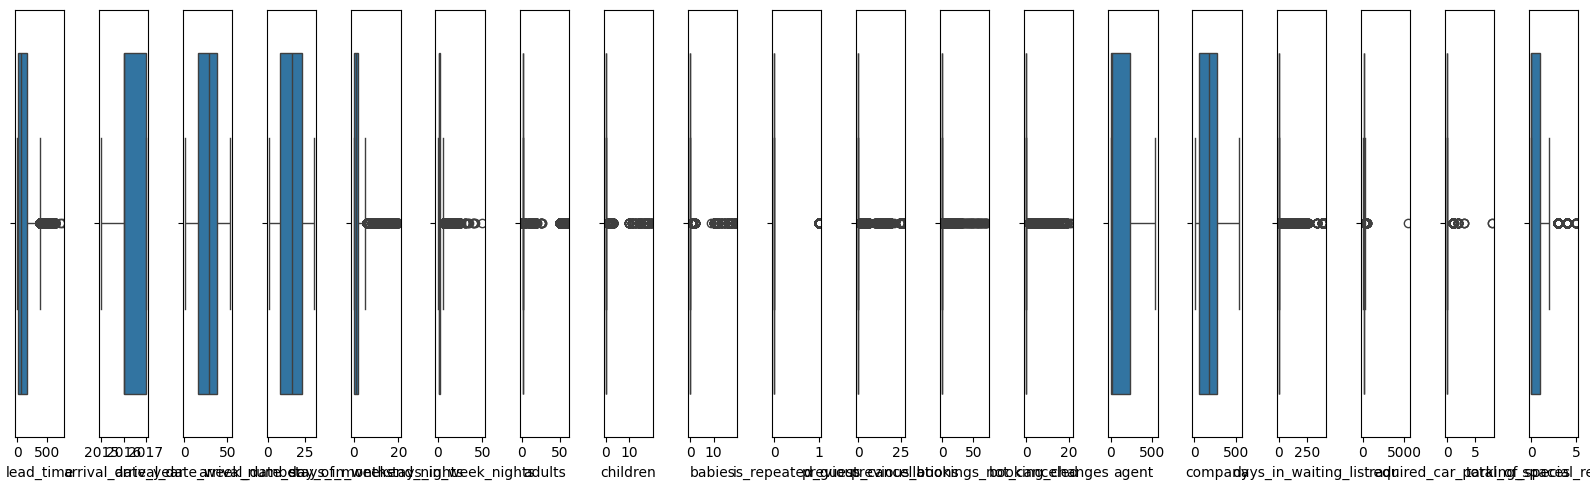


Estadisticas basicas de columnas categoricas:


,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,False,75166
arrival_date_month,119390,15,August,13877
meal,119390,5,BB,92310
country,65054,163,PRT,26577
market_segment,59934,8,Online TA,28331
distribution_channel,105899,5,TA/TO,86822
reserved_room_type,79275,10,A,57202
assigned_room_type,119390,12,A,74053
customer_type,94199,4,Transient,70610


In [91]:
# Guardo cada csv en un Dataframe
def csv_to_dataframe(file):
    return pd.read_csv(file, index_col=0)

df = csv_to_dataframe("finanzas-hotel-bookings.csv")

dataframe_exploration(df, "Finanzas Hotel Bookings")

### 1. Limpieza de Datos:


In [92]:
def clean_data(df):
    # Elimino duplicados si los hay
    if df.duplicated().any():
        print(f"Hay {df.duplicated().sum()} registros duplicados encontrados y eliminados.")
        df = df.drop_duplicates(keep='first')
    else:
        print("No se encontraron duplicados.")
    
    # Elimino columnas con más del 80% de registros nulos
    cols_null_percentage = df.isnull().mean(axis=0)
    cols_to_remove = cols_null_percentage[cols_null_percentage > 0.8].index

    if not cols_to_remove.empty:
        df = df.drop(columns=cols_to_remove)
        print(f"Columnas eliminadas con más del 80% de valores nulos: {list(cols_to_remove)}")
    else:
        print("No se eliminaron columnas por valores nulos.")
        
    # Elimino filas con más del 80% de sus campos nulos
    row_null_percentage = df.isnull().mean(axis=1)
    rows_to_remove = row_null_percentage[row_null_percentage > 0.8].index

    if not rows_to_remove.empty:
        df = df.drop(index=rows_to_remove)
        removed_rows = len(rows_to_remove)
        print(f"Número total de registros eliminados con más del 80% de sus campos nulos: {removed_rows}")
    else:
        print("No se eliminaron registros por valores nulos.")

    # Elimino columnas con un solo valor unico
    cols_one_value = [col for col in df.columns if df[col].nunique() == 1]
    if cols_one_value:
        df = df.drop(columns=cols_one_value)
        print(f"Columnas eliminadas con solo un valor unico: {cols_one_value}")
    else:
        print("No se encontraron columnas con solo un valor unico.")
        
    # Redondeo columnas tipo float a dos decimales si no se pueden convertir a enteros
    cols_float = df.select_dtypes(include=[float]).columns
    if cols_float.any():
        print(f"Columnas tipo float redondeadas a dos decimales o convertidas a enteros: {list(cols_float)}")
        for col in cols_float:
            df[col] = df[col].apply(lambda x: round(x, 2) if x % 1 != 0 else int(x))
    else:
        print("No se encontraron columnas tipo float.")
       
    return df

In [93]:
df_cleaned= clean_data(df)
df_cleaned

Hay 63040 registros duplicados encontrados y eliminados.
Columnas eliminadas con más del 80% de valores nulos: ['company', '0']
Número total de registros eliminados con más del 80% de sus campos nulos: 1832
No se encontraron columnas con solo un valor unico.
Columnas tipo float redondeadas a dos decimales o convertidas a enteros: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015.0,July,27.0,1.0,0,0,2,NaN,0,BB,PRT,NaN,Direct,0.0,NaN,0,C,C,3,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
1,Resort Hotel,False,737,NaN,July,27.0,1.0,0,0,2,NaN,0,BB,NaN,NaN,Direct,0.0,0.0,0,NaN,C,4,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01 00:00:00
2,Resort Hotel,False,7,2015.0,July,27.0,1.0,0,1,1,0.0,0,BB,GBR,NaN,Direct,0.0,0.0,0,A,C,0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
3,Resort Hotel,False,13,NaN,July,27.0,1.0,0,1,1,NaN,0,BB,GBR,Corporate,Corporate,0.0,0.0,0,A,A,0,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02 00:00:00
4,Resort Hotel,False,14,NaN,July,NaN,1.0,0,2,2,NaN,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,A,A,0,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017.0,August,35.0,30.0,2,5,2,0.0,0,BB,NaN,Offline TA/TO,TA/TO,0.0,0.0,0,A,A,0,394.0,0,NaN,96.14,0,0,Check-Out,2017-06-09 00:00:00
119386,City Hotel,False,102,NaN,August,35.0,31.0,2,5,3,NaN,0,BB,FRA,NaN,TA/TO,0.0,NaN,0,E,E,0,9.0,0,Transient,225.43,0,2,Check-Out,2017-07-09 00:00:00
119387,City Hotel,False,34,2017.0,August,35.0,31.0,2,5,2,NaN,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,NaN,D,0,9.0,0,Transient,157.71,0,4,Check-Out,2017-07-09 00:00:00
119388,City Hotel,False,109,NaN,August,35.0,31.0,2,5,55,0.0,0,BB,NaN,Online TA,TA/TO,0.0,0.0,0,A,A,0,89.0,0,Transient,104.40,0,0,Check-Out,2017-07-09 00:00:00


### 2. Gestión de nulos:

In [96]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulls_col_num = df_cleaned[df_cleaned.columns[df_cleaned.isnull().any()]].select_dtypes(include = np.number).columns
print(f"Las columnas numéricas que tienen nulos son:\n{nulls_col_num}\n")
print(f"El numero de nulos que tiene cada columna numerica es:\n{df_cleaned[nulls_col_num].isnull().sum() / df_cleaned.shape[0]}")

Las columnas numéricas que tienen nulos son:
Index(['arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'children', 'is_repeated_guest',
       'previous_cancellations', 'agent'],
      dtype='object')

El numero de nulos que tiene cada columna numerica es:
arrival_date_year            0.457455
arrival_date_week_number     0.155400
arrival_date_day_of_month    0.001008
children                     0.420525
is_repeated_guest            0.042473
previous_cancellations       0.363196
agent                        0.136859
dtype: float64


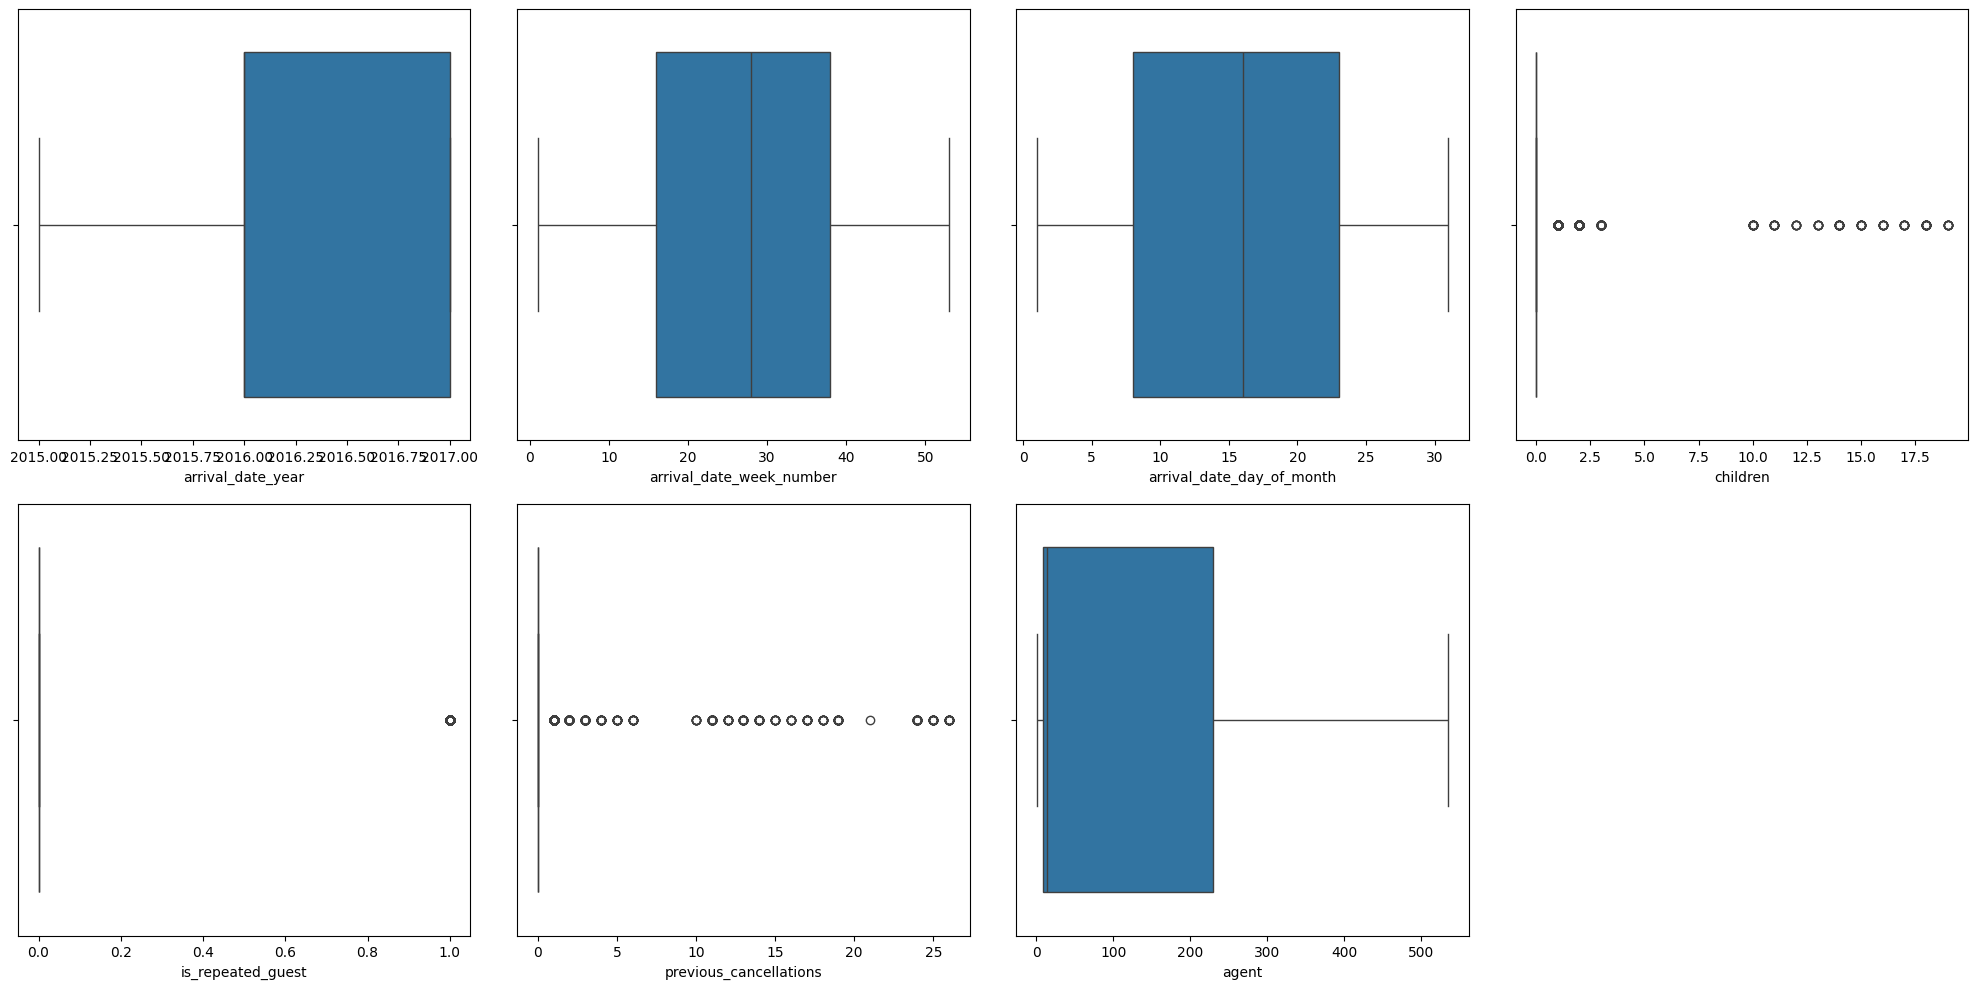

In [98]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulls_col_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1])

In [ ]:
arrival_date_year            0.457455
children                     0.420525 atipicos
previous_cancellations       0.363196 atipicos
is_repeated_guest            0.042473 atipicos

arrival_date_week_number     0.155400
arrival_date_day_of_month    0.001008
agent                        0.13685

In [ ]:
# Calcular la mediana para cada columna específica y rellenar los valores nulos
def impute_with_median (cols):
    for col in cols:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        df[col] = df[col].round(2)
    # Comprobar los nulos para cada columna específica
    for col in cols:
        print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")